# QUESTION

Below is a table showing the age-specific death rates from chronic obstructive pulmonary disease (COPD) in both the United States and Uganda in 2019. The values are given as deaths per 100,000 people.

Your task is to write a Python script that calculates both the crude death rate and the age-standardized death rate for COPD for all ages in both the United States and Uganda for 2019.

Your answers should represent the whole population of each country, and the value should be given as deaths per 100,000 people, rounded to one decimal place.

| Age group (years) | Death rate, United States, 2019 | Death rate, Uganda, 2019 |
| --- | --- | --- |
| 0-4 | 0.04 | 0.40 |
| 5-9 | 0.02 | 0.17 |
| 10-14 | 0.02 | 0.07 |
| 15-19 | 0.02 | 0.23 |
| 20-24 | 0.06 | 0.38 |
| 25-29 | 0.11 | 0.40 |
| 30-34 | 0.29 | 0.75 |
| 35-39 | 0.56 | 1.11 |
| 40-44 | 1.42 | 2.04 |
| 45-49 | 4.00 | 5.51 |
| 50-54 | 14.13 | 13.26 |
| 55-59 | 37.22 | 33.25 |
| 60-64 | 66.48 | 69.62 |
| 65-69 | 108.66 | 120.78 |
| 70-74 | 213.10 | 229.88 |
| 75-79 | 333.06 | 341.06 |
| 80-84 | 491.10 | 529.31 |
| 85+ | 894.45 | 710.40 |

## Working methods

The age specific population data as a .csv file was used WPP2022_PopulationExposureByAge5GroupSex_Medium.csv from the WHO website to get the population distribution 
for specific age groups. The data file was processed filtering all the unrequired data and the useful information was stored in the pandas data frame named df_1(US) and df_2(Uganda).

The data for age specific death rate for US and Uganda was already supplied and it was stored in the data frame named df_3.

The data for the age standadized rate was taken from Table 1 in 'Ahmad OB, Boschi-Pinto C, Lopez AD, Murray CJ, Lozano R, Inoue M (2001). Age standardization of rates: a new WHO standard.' and stored in data frame named df_4. 

There was a outer join performed to merge the data frames containing the age specific population for the respective countries with the data frame containing age specific death rates. The crude death rate for each age interval was calculated using the formula No. of deaths per 100000 population/ Estimated population in 100000 and the total was calculated summing up all age intervals.

There was a outer join performed to merge the data frames containing the age specific population for respective countried with the data frame containing standard population distribution percent (WHO standard). The age standardized death rate for COPD for each age interval was calculated using the formula, Age specific crude death rate per 100000 population X age specific standard population distribution.

A plot comparing the crude death rate and standardized death rate between US and Uganda is shown at the end. It can be seen that around the age 45 and after the rate for US increases and at older ages it sky rockets comapred to Uganga rates. 

In [1]:
# Importing different libraries

import numpy as np
import pandas as pd

In [2]:
# Reading the population data from the csv file 

data = pd.read_csv('WPP2022_PopulationExposureByAge5GroupSex_Medium.csv')

/tmp/ipykernel_3903/1280335558.py:3: DtypeWarning: Columns (2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('WPP2022_PopulationExposureByAge5GroupSex_Medium.csv')


In [3]:
# Gathering information about the data

data.info()

print(list(data.columns))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903735 entries, 0 to 903734
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   SortOrder    903735 non-null  int64  
 1   LocID        903735 non-null  int64  
 2   Notes        237825 non-null  object 
 3   ISO3_code    748356 non-null  object 
 4   ISO2_code    745185 non-null  object 
 5   SDMX_code    891051 non-null  float64
 6   LocTypeID    903735 non-null  int64  
 7   LocTypeName  903735 non-null  object 
 8   ParentID     903735 non-null  int64  
 9   Location     903735 non-null  object 
 10  VarID        903735 non-null  int64  
 11  Variant      903735 non-null  object 
 12  Time         903735 non-null  int64  
 13  MidPeriod    903735 non-null  float64
 14  AgeGrp       903735 non-null  object 
 15  AgeGrpStart  903735 non-null  int64  
 16  AgeGrpSpan   903735 non-null  int64  
 17  PopMale      903735 non-null  float64
 18  PopFemale    903735 non-

In [4]:
# Dropping the data columns that are not required

data = data.drop( ['SortOrder','LocID', 'Notes', 'ISO3_code', 'ISO2_code', 'SDMX_code', 'LocTypeID', 'LocTypeName', 
          'ParentID', 'VarID', 'Variant', 'MidPeriod', 'AgeGrpStart', 'AgeGrpSpan', 'PopMale',
          'PopFemale'],axis =1)

In [5]:
# Customising the age specific population table for US 


df_1 = data.loc[(data['Location']=='United States Virgin Islands')&(data['Time']==2019)] # keeping only the required columns of the table

#df_1.rename({'AgeGrp':'Age group (years)'}, axis = 1)

df_1['AgeGrp'] = df_1['AgeGrp'].astype('string')# changing object to string

df_1.at[718112,'AgeGrp'] = '85+' # changing the age interval 85-90 to 85+ at specific index

sum_popl_above_85 = df_1.iloc[-4:,-1].sum() # Calculating the net population age 85 and above 

print(sum_popl_above_85)

df_1.at[718112,'PopTotal'] = sum_popl_above_85 # replacing the specific row with the net population

df_1.drop(df_1.tail(3).index,inplace=True) # Dropping the last 3 rows

df_1 # final data frame to be used for calculation



1.365


/tmp/ipykernel_3903/982574934.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['AgeGrp'] = df_1['AgeGrp'].astype('string')# changing object to string
/tmp/ipykernel_3903/982574934.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.drop(df_1.tail(3).index,inplace=True) # Dropping the last 3 rows


,Location,Time,AgeGrp,PopTotal
718095,United States Virgin Islands,2019,0-4,6.346
718096,United States Virgin Islands,2019,5-9,6.938
718097,United States Virgin Islands,2019,10-14,6.268
718098,United States Virgin Islands,2019,15-19,5.223
718099,United States Virgin Islands,2019,20-24,4.962
718100,United States Virgin Islands,2019,25-29,5.316
718101,United States Virgin Islands,2019,30-34,5.245
718102,United States Virgin Islands,2019,35-39,6.147
718103,United States Virgin Islands,2019,40-44,6.228
718104,United States Virgin Islands,2019,45-49,6.782


In [6]:
# Customising the age specific population table for Uganda


df_2 = data.loc[(data['Location']=='Uganda')&(data['Time']==2019)] # keeping only the required columns of the table

df_2['AgeGrp'] = df_2['AgeGrp'].astype('string')# changing object to string

df_2.at[128306,'AgeGrp'] = '85+' # changing the age interval 85-90 to 85+ at specific index

sum_popln_above_85 = df_2.iloc[-4:,-1].sum() # Calculating the net population age 85 and above 

print(sum_popln_above_85)

df_2.at[128306,'PopTotal'] = sum_popln_above_85 # replacing the specific row with the net population

df_2.drop(df_2.tail(3).index,inplace=True) # Dropping the last 3 rows

df_2 # final data frame to be used for calculation


19.406000000000002


/tmp/ipykernel_3903/3347751330.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['AgeGrp'] = df_2['AgeGrp'].astype('string')# changing object to string
/tmp/ipykernel_3903/3347751330.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.drop(df_2.tail(3).index,inplace=True) # Dropping the last 3 rows


,Location,Time,AgeGrp,PopTotal
128289,Uganda,2019,0-4,7338.206
128290,Uganda,2019,5-9,6612.999
128291,Uganda,2019,10-14,5898.037
128292,Uganda,2019,15-19,5145.240
128293,Uganda,2019,20-24,4337.896
128294,Uganda,2019,25-29,3489.664
128295,Uganda,2019,30-34,2611.240
128296,Uganda,2019,35-39,1898.230
128297,Uganda,2019,40-44,1500.441
128298,Uganda,2019,45-49,1232.892


In [7]:
# Creating the data frame for the death rates in US and Uganda in 2019

list_death_rate = [['0-4',0.04,0.40], ['5-9',0.02,0.17], ['10-14',0.02,0.07], ['15-19',0.02, 0.23],
                  ['20-24',0.06,0.38], ['25-29',0.11,0.40], ['30-34',0.29,0.75], ['35-39',0.56,1.11],
                  ['40-44',1.42,2.04], ['45-49',4.00,5.51], ['50-54',14.13,13.26], ['55-59',37.22,33.25],
                  ['60-64',66.48,69.62], ['65-69',108.66,120.78],['70-74',213.10,229.88], ['75-79',333.06,341.06],
                  ['80-84',491.10,529.31], ['85+',894.45,710.40]]


df_3 = pd.DataFrame(list_death_rate, columns = ['AgeGrp','Death rate, United States, 2019',
                                                'Death rate, Uganda, 2019'])

df_3 # Data frame containing death rates in US and Uganda in 2019                   

,AgeGrp,"Death rate, United States, 2019","Death rate, Uganda, 2019"
0,0-4,0.04,0.40
1,5-9,0.02,0.17
2,10-14,0.02,0.07
3,15-19,0.02,0.23
4,20-24,0.06,0.38
5,25-29,0.11,0.40
6,30-34,0.29,0.75
7,35-39,0.56,1.11
8,40-44,1.42,2.04
9,45-49,4.00,5.51


In [8]:
# Creating the data frame for the standard population distribution percent according to WHO standard 

list_standrd_popl_dist = [['0-4',8.86],['5-9',8.69],['10-14',8.60],['15-19',8.47],['20-24',8.22],['25-29',7.93],
                          ['30-34',7.61],['35-39',7.15],['40-44',6.59],['45-49',6.04],['50-54',5.37],
                          ['55-59',4.55],['60-64',3.72],['65-69',2.96],['70-74',2.21],
                          ['75-79',1.52],['80-84',0.91],['85+', 0.63]]

df_4 = pd.DataFrame(list_standrd_popl_dist, columns = ['AgeGrp','WHO World Standard'])

df_4 # Data frame containing standard population distribution WHO standard   

,AgeGrp,WHO World Standard
0,0-4,8.86
1,5-9,8.69
2,10-14,8.60
3,15-19,8.47
4,20-24,8.22
5,25-29,7.93
6,30-34,7.61
7,35-39,7.15
8,40-44,6.59
9,45-49,6.04


In [9]:
# Calculating the crude death rate for US population 2019

data_crude_death_US =  pd.merge(df_1, df_3, how = 'outer', on = ['AgeGrp']) # performing outer join on data frame 1 and data frame 3
data_crude_death_US = data_crude_death_US.drop('Death rate, Uganda, 2019', axis = 1) # droping the unnecessary column
data_crude_death_US
\
data_crude_death_US['Age sp. crude death rate'] = ((data_crude_death_US['Death rate, United States, 2019'])/(data_crude_death_US['PopTotal']))# Calculating age specific crude death rate per 100000 population for each row
display(data_crude_death_US)

data_crude_death_US_total = data_crude_death_US.iloc[:,-1].sum()# Crude death rate for total population
print("Crude death rate for the entire US population in 2019:", data_crude_death_US_total)




,Location,Time,AgeGrp,PopTotal,"Death rate, United States, 2019",Age sp. crude death rate
0,United States Virgin Islands,2019,0-4,6.346,0.04,0.006303
1,United States Virgin Islands,2019,5-9,6.938,0.02,0.002883
2,United States Virgin Islands,2019,10-14,6.268,0.02,0.003191
3,United States Virgin Islands,2019,15-19,5.223,0.02,0.003829
4,United States Virgin Islands,2019,20-24,4.962,0.06,0.012092
5,United States Virgin Islands,2019,25-29,5.316,0.11,0.020692
6,United States Virgin Islands,2019,30-34,5.245,0.29,0.055291
7,United States Virgin Islands,2019,35-39,6.147,0.56,0.091101
8,United States Virgin Islands,2019,40-44,6.228,1.42,0.228003
9,United States Virgin Islands,2019,45-49,6.782,4.00,0.589797


Crude death rate for the entire US population in 2019: 1060.9099348561897


In [10]:
# Calculating standardized death rate for US population 2019

data_std_death_US =  pd.merge(data_crude_death_US, df_4, how = 'outer', on = ['AgeGrp'])# Performing outer join on data frame 4 data frame containing age specific crude death rate calculation
data_std_death_US = data_std_death_US.drop('Death rate, United States, 2019', axis = 1)# Dropping unnecessary column
data_std_death_US
data_std_death_US['Age sp. std death rate'] = ((data_std_death_US['Age sp. crude death rate'])*(data_std_death_US['WHO World Standard']))# Calculating standardized death rate per 100000 population for each age gap
display(data_std_death_US)
data_std_death_US_total = data_std_death_US.iloc[:,-1].sum() # Calculating total standardized death rate for entire population
print("Standardized death rate for the entire US population in 2019:", data_std_death_US_total)


,Location,Time,AgeGrp,PopTotal,Age sp. crude death rate,WHO World Standard,Age sp. std death rate
0,United States Virgin Islands,2019,0-4,6.346,0.006303,8.86,0.055846
1,United States Virgin Islands,2019,5-9,6.938,0.002883,8.69,0.025050
2,United States Virgin Islands,2019,10-14,6.268,0.003191,8.60,0.027441
3,United States Virgin Islands,2019,15-19,5.223,0.003829,8.47,0.032433
4,United States Virgin Islands,2019,20-24,4.962,0.012092,8.22,0.099395
5,United States Virgin Islands,2019,25-29,5.316,0.020692,7.93,0.164090
6,United States Virgin Islands,2019,30-34,5.245,0.055291,7.61,0.420763
7,United States Virgin Islands,2019,35-39,6.147,0.091101,7.15,0.651375
8,United States Virgin Islands,2019,40-44,6.228,0.228003,6.59,1.502537
9,United States Virgin Islands,2019,45-49,6.782,0.589797,6.04,3.562371


Standardized death rate for the entire US population in 2019: 975.3467819605482


In [11]:
# Calculating the crude death rate for Uganda population 2019

data_crude_death_Uganda =  pd.merge(df_2, df_3, how = 'outer', on = ['AgeGrp']) # Performing outer join on data frame 2 and 3 
data_crude_death_Uganda = data_crude_death_Uganda.drop('Death rate, United States, 2019', axis = 1) # dropping unnecessary column
data_crude_death_Uganda 

data_crude_death_Uganda['Age sp. crude death rate'] = ((data_crude_death_Uganda['Death rate, Uganda, 2019'])/(data_crude_death_Uganda['PopTotal']))# Calculating the crude death rate per 100000 population for each age gap
display(data_crude_death_Uganda)

data_crude_death_Uganda_total = data_crude_death_Uganda.iloc[:,-1].sum()# Total crude death rate for entire population
print("Crude death rate for the entire Uganda population in 2019:", data_crude_death_Uganda_total)






,Location,Time,AgeGrp,PopTotal,"Death rate, Uganda, 2019",Age sp. crude death rate
0,Uganda,2019,0-4,7338.206,0.40,0.000055
1,Uganda,2019,5-9,6612.999,0.17,0.000026
2,Uganda,2019,10-14,5898.037,0.07,0.000012
3,Uganda,2019,15-19,5145.240,0.23,0.000045
4,Uganda,2019,20-24,4337.896,0.38,0.000088
5,Uganda,2019,25-29,3489.664,0.40,0.000115
6,Uganda,2019,30-34,2611.240,0.75,0.000287
7,Uganda,2019,35-39,1898.230,1.11,0.000585
8,Uganda,2019,40-44,1500.441,2.04,0.001360
9,Uganda,2019,45-49,1232.892,5.51,0.004469


Crude death rate for the entire Uganda population in 2019: 54.111822455866914


In [12]:
# Calculating standardized death rate for Uganda population 2019

data_std_death_Uganda =  pd.merge(data_crude_death_Uganda, df_4, how = 'outer', on = ['AgeGrp'])# Performing outer join on data frame 4 and data frame containing crude death rate
data_std_death_Uganda = data_std_death_Uganda.drop('Death rate, Uganda, 2019', axis = 1)# Dropping unnecessary column
data_std_death_Uganda

data_std_death_Uganda['Age sp. std death rate'] = ((data_std_death_Uganda['Age sp. crude death rate'])*(data_std_death_Uganda['WHO World Standard']))# Calculating standardized death rate for each age group per 100000 population
display(data_std_death_Uganda)

data_std_death_Uganda_total = data_std_death_Uganda.iloc[:,-1].sum()# Total standardized death rate for entire population
print("Total standardized death rate for the entire Uganda population in 2019:", data_std_death_Uganda_total)


,Location,Time,AgeGrp,PopTotal,Age sp. crude death rate,WHO World Standard,Age sp. std death rate
0,Uganda,2019,0-4,7338.206,0.000055,8.86,0.000483
1,Uganda,2019,5-9,6612.999,0.000026,8.69,0.000223
2,Uganda,2019,10-14,5898.037,0.000012,8.60,0.000102
3,Uganda,2019,15-19,5145.240,0.000045,8.47,0.000379
4,Uganda,2019,20-24,4337.896,0.000088,8.22,0.000720
5,Uganda,2019,25-29,3489.664,0.000115,7.93,0.000909
6,Uganda,2019,30-34,2611.240,0.000287,7.61,0.002186
7,Uganda,2019,35-39,1898.230,0.000585,7.15,0.004181
8,Uganda,2019,40-44,1500.441,0.001360,6.59,0.008960
9,Uganda,2019,45-49,1232.892,0.004469,6.04,0.026994


Total standardized death rate for the entire Uganda population in 2019: 44.12930044591589


<Axes: title={'center': ' Crude Death rate comparison US and Uganda 2019'}, xlabel='AgeGrp', ylabel='Age sp. crude death rate'>

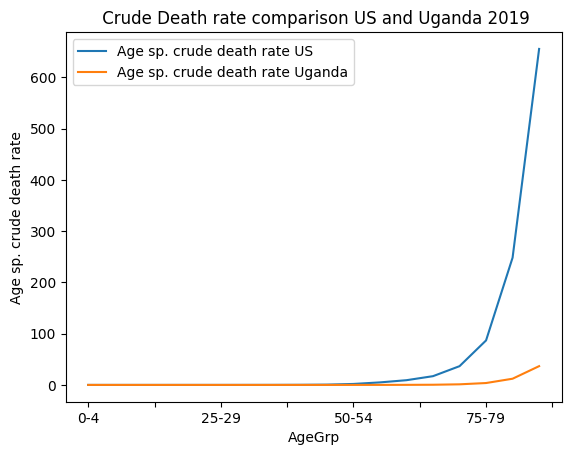

In [30]:
#Plotting the age specific crude death rates for US and Uganda

Comparison_crude_death_rates = pd.merge(data_crude_death_US, data_crude_death_Uganda, how = 'outer', on = ['AgeGrp','Time'])

Comparison_crude_death_rates = Comparison_crude_death_rates.rename({'Age sp. crude death rate_x':'Age sp. crude death rate US', 
                                    'Age sp. crude death rate_y': 'Age sp. crude death rate Uganda'}, axis =1)

Comparison_crude_death_rates.plot(x = 'AgeGrp', y = ['Age sp. crude death rate US','Age sp. crude death rate Uganda'], ylabel = 'Age sp. crude death rate',title = ' Crude Death rate comparison US and Uganda 2019')


<Axes: title={'center': ' Standardized Death rate comparison US and Uganda 2019'}, xlabel='AgeGrp', ylabel='Age sp. std death rate'>

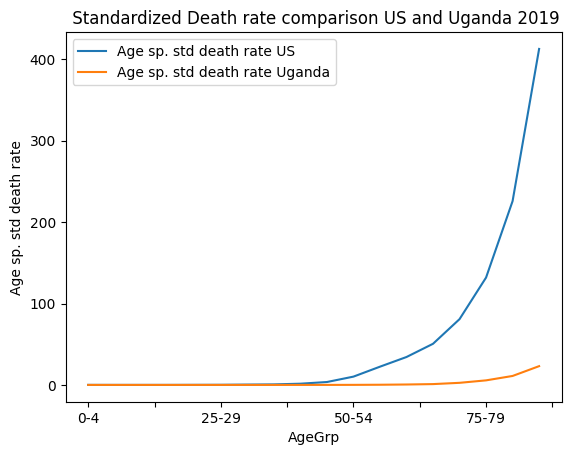

In [33]:
#Plotting the age specific standardized death rates for US and Uganda

Comparison_std_death_rates = pd.merge(data_std_death_US, data_std_death_Uganda, how = 'outer', on = ['AgeGrp','Time'])

Comparison_std_death_rates = Comparison_std_death_rates.rename({'Age sp. std death rate_x':'Age sp. std death rate US', 
                                    'Age sp. std death rate_y': 'Age sp. std death rate Uganda'}, axis =1)

Comparison_std_death_rates.plot(x = 'AgeGrp', y = ['Age sp. std death rate US','Age sp. std death rate Uganda'], ylabel = 'Age sp. std death rate',title = ' Standardized Death rate comparison US and Uganda 2019')
